In [58]:
import pandas as pd
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
import re
from nltk import corpus
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
df = pd.read_csv('/content/airline.csv')

In [6]:
len(df['airline_name'].unique())

362

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41396 entries, 0 to 41395
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   airline_name                   41396 non-null  object 
 1   link                           41396 non-null  object 
 2   title                          41396 non-null  object 
 3   author                         41396 non-null  object 
 4   author_country                 39805 non-null  object 
 5   date                           41396 non-null  object 
 6   content                        41396 non-null  object 
 7   aircraft                       1278 non-null   object 
 8   type_traveller                 2378 non-null   object 
 9   cabin_flown                    38520 non-null  object 
 10  route                          2341 non-null   object 
 11  overall_rating                 36861 non-null  float64
 12  seat_comfort_rating            33706 non-null 

In [8]:
df['cabin_flown'].unique()

array(['Economy', 'Business Class', nan, 'Premium Economy', 'First Class'],
      dtype=object)

In [15]:
df1 = df[['recommended','content']]

In [ ]:
df1['content'] = df1['content'].replace('[^a-zA-Z]',' ', regex = True)
df1['content'] = df1['content'].str.lower()

In [24]:
all_stopwords = stopwords.words('english') + ['would', 'could', 'one','flight','hence', 'p','h','still','back','may','us','say','see','two','make','said','need','like','want','going','year','come','com','lot','even','u','also','get','new','take','according','set','event','old','first','way','day']

In [25]:
df1['content'] = df1['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))

<ipython-input-25-6bdbcdc88270>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['content'] = df1['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))


In [27]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [28]:
df1['content'] = df1.content.apply(lemmatize_text)

<ipython-input-28-d32b8db0782c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['content'] = df1.content.apply(lemmatize_text)


In [ ]:
df1['content'] = df1.content.apply(' '.join)

In [35]:
df2 = df1[df1['recommended'] == 1]
df3 = df1[df1['recommended'] == 0]

In [66]:
pd.Series(' '.join(df2['content']).lower().split()).value_counts()[:5]

flight     40899
seat       18802
good       16424
time       14118
service    13775
dtype: int64

In [67]:
pd.Series(' '.join(df3['content']).lower().split()).value_counts()[:5]

flight     45370
seat       17923
hour       14338
time       11770
airline    11689
dtype: int64

In [ ]:
df2.reset_index(inplace = True)
df3.reset_index(inplace = True)

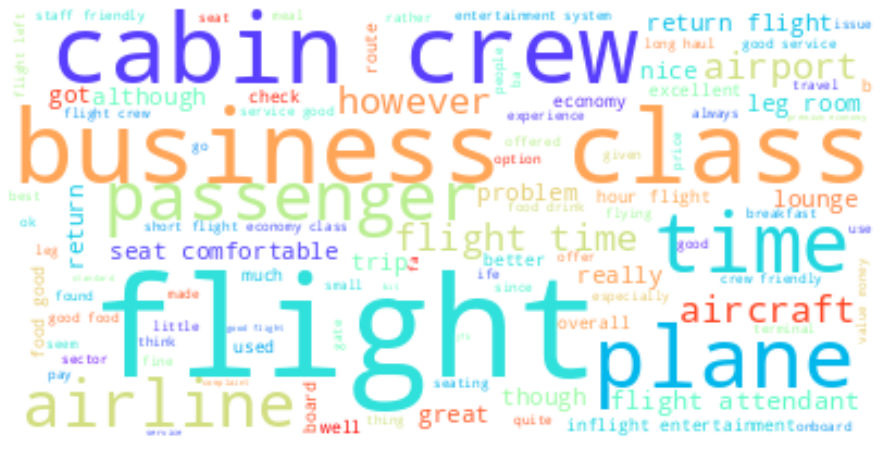

<Figure size 432x288 with 0 Axes>

In [69]:
corpus = []
for i in range(0, len(df2)-1):
  cont = re.sub('[^a-zA-Z]', ' ', str(df2['content'][i]) ) # we are using regex to remove any special characters that are not alphabets
  cont = cont.lower() # we are converting the text to lower case
  corpus.append(cont)

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(background_color='white',contour_color='#023075',contour_width=3,colormap='rainbow', max_words = 100, stopwords = all_stopwords).generate(str(corpus))
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() # to display the result of 
plt.savefig('recommended.png',dpi=300)

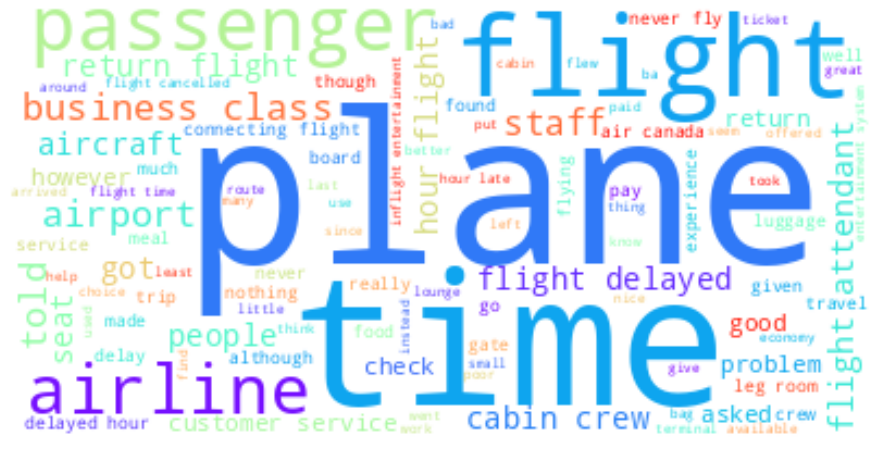

<Figure size 432x288 with 0 Axes>

In [70]:
corpus = []
for i in range(0, len(df3)-1):
  cont = re.sub('[^a-zA-Z]', ' ', str(df3['content'][i]) ) # we are using regex to remove any special characters that are not alphabets
  cont = cont.lower() # we are converting the text to lower case
  corpus.append(cont)

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(background_color='white',contour_color='#023075',contour_width=3,colormap='rainbow', max_words = 100, stopwords = all_stopwords).generate(str(corpus))
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() # to display the result of 
plt.savefig('not_recommended.png', dpi = 300)

In [59]:
# Vectorization
vect =TfidfVectorizer(max_features=1000)
vect_text = vect.fit_transform(df2["content"])

# LDA
lda_model=LatentDirichletAllocation(n_components=10,
learning_method='online',random_state=42,max_iter=3, n_jobs = -1)
topics_model = lda_model.fit_transform(vect_text)

# get topics as list
topic1 = []
vocab = vect.get_feature_names_out()
for i, comp in enumerate(lda_model.components_):
  topic_list1 = []
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
  for t in sorted_words:
    topic_list1.append(t[0])
  topic1.append(topic_list1)

In [61]:
pd.DataFrame(topic1)

,0,1,2,3,4,5,6,7,8,9
0,zrh,swiss,madrid,brussels,mad,iberia,comfy,barcelona,rome,melbourne
1,flight,time,th,staff,ryanair,flew,return,airline,problem,helpful
2,flight,seat,good,service,time,food,airline,class,crew,cabin
3,bne,sfo,paris,france,love,plentiful,evening,nz,somewhat,air
4,istanbul,jnb,luton,jan,bru,abu,dhabi,tlv,del,feb
5,flight,time,good,crew,friendly,clean,drink,service,nice,cabin
6,good,flight,food,service,seat,entertainment,class,excellent,bkk,crew
7,doha,qatar,barcelona,kul,manila,bangkok,perth,brisbane,thai,surprised
8,dxb,bag,colombo,check,luggage,baggage,checked,boarding,online,drop
9,zurich,lh,muc,cph,sin,kef,vienna,lufthansa,berlin,vie


In [62]:
# Vectorization
vect =TfidfVectorizer(max_features=1000)
vect_text = vect.fit_transform(df3["content"])

# LDA
lda_model=LatentDirichletAllocation(n_components=10,
learning_method='online',random_state=42,max_iter=3, n_jobs = -1)
topics_model = lda_model.fit_transform(vect_text)

# get topics as list
topic1 = []
vocab = vect.get_feature_names_out()
for i, comp in enumerate(lda_model.components_):
  topic_list1 = []
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
  for t in sorted_words:
    topic_list1.append(t[0])
  topic1.append(topic_list1)

In [64]:
pd.DataFrame(topic1)

,0,1,2,3,4,5,6,7,8,9
0,miami,delhi,wheelchair,moscow,cdg,france,steward,assistance,american,ignored
1,newark,lauderdale,am,ft,phoenix,dallas,personal,aa,size,miami
2,sunwing,canada,westjet,rouge,manila,toronto,ac,vancouver,mexico,cancun
3,flight,crew,service,food,meal,seat,drink,cabin,good,time
4,flight,hour,delayed,airport,time,plane,airline,told,delay,gate
5,seat,flight,class,food,business,spirit,service,airline,entertainment,cabin
6,brussels,club,flat,impressed,class,jfk,bed,efficient,business,lie
7,dubai,boston,son,york,september,ignored,size,lady,jfk,stopped
8,bag,carry,lisbon,pay,luggage,charge,fee,kg,extra,charged
9,seat,flight,leg,room,row,thomson,front,extra,uncomfortable,plane
